In [1]:
from rocketpy.Function import Function, PiecewiseFunction
import numpy as np

In [2]:
tank_geometry = {(0, 1): lambda y: np.sqrt(1 ** 2 - (1 - y) ** 2), (1, 5): lambda y: 1, (5, 6): lambda y: np.sqrt(1 ** 2 - (y - 5) ** 2)}

In [3]:
tank_rad = PiecewiseFunction(tank_geometry, inputs=["Height"], outputs=["Radius"])

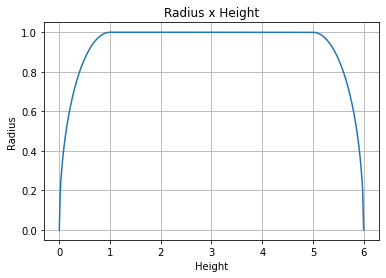

In [4]:
tank_rad.plot1D()

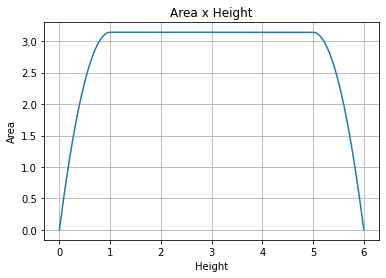

In [5]:
tank_area = np.pi * tank_rad ** 2
tank_area.setOutputs(["Area"])
tank_area()

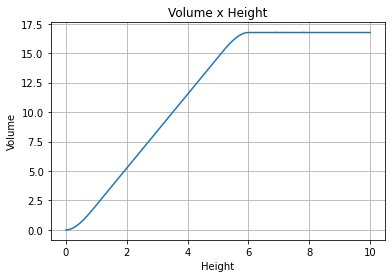

In [6]:
tank_vol = Function(lambda h: tank_area.integral(0, h), inputs=["Height"], outputs=["Volume"])
tank_vol()

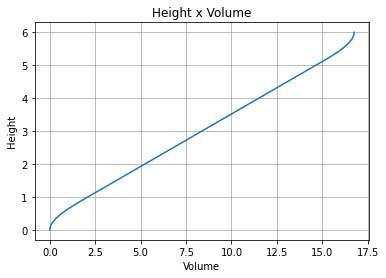

In [11]:
tr = tank_vol.reverse(0, 6)
tr()

In [1]:
from rocketpy.motors.LiquidMotor import *
from rocketpy.Function import *
from rocketpy.motors.Fluid import Fluid
import numpy as np
from scipy.optimize import fmin

In [77]:
# tank_radius_function = {(0, 5): 0.0744}
# tank_radius_function = {(0, 5): 1}
tank_radius_function = {(0, 7): .02}
lox = Fluid(name = "LOx", density = 1141, quality = 1.0) #Placeholder quality value
n2 = Fluid(name = "Nitrogen Gas", density = 51.75, quality = 1.0) #Placeholder quality value; density value may be estimate
initial_liquid_mass = 10
initial_gas_mass = .05
liquid_mass_flow_rate_in = .1
gas_mass_flow_rate_in = .01
liquid_mass_flow_rate_out = .2
gas_mass_flow_rate_out = .02

t = MassFlowRateBasedTank("Test Tank", tank_radius_function,
        initial_liquid_mass, initial_gas_mass, liquid_mass_flow_rate_in,
        gas_mass_flow_rate_in, liquid_mass_flow_rate_out, 
        gas_mass_flow_rate_out, lox, n2)

In [78]:
def inertia2():
    def Ii(start, stop, density):
        r = t.tank_geometry
        rho = density
        z = Function(lambda x: x)
        Izz = Iz(start, stop, density)
        return Izz / 2 + rho * np.pi * (z ** 2 * r ** 2).integral(start, stop) / 4
    
    def Iz(start, stop, density):
        r = t.tank_geometry
        rho = density
        return (rho * np.pi / 2) * (r ** 4).integral(start, stop)

    lh = t.liquidHeight()
    return Function(lambda time: (Ii(0, lh(time), t.liquid.density), Iz(0, lh(time), t.liquid.density)))

In [79]:
i2 = inertia2()

In [80]:
t.liquidHeight()(0)

array([6.974375])

In [81]:
i2(0)

(40.53599718470806, 0.0020000036996413576)

In [3]:
from rocketpy import Fluid
import numpy as np

In [10]:
lox = Fluid(name = "LOx", density = 1141, quality = 1.0) #Placeholder quality value
n2 = Fluid(name = "Nitrogen Gas", density = 51.75, quality = 1.0) #Placeholder quality value; density value may be estimate
initial_liquid_mass = 5
initial_gas_mass = .1
liquid_mass_flow_rate_in = .1
gas_mass_flow_rate_in = .01
liquid_mass_flow_rate_out = .2
gas_mass_flow_rate_out = .02

r = 1
alv = lambda x: (initial_liquid_mass + (liquid_mass_flow_rate_in - liquid_mass_flow_rate_out) * x) / lox.density
alh = lambda x: alv(x) / (np.pi)
m = lambda x: (initial_liquid_mass + (liquid_mass_flow_rate_in - liquid_mass_flow_rate_out) * x) + \
            (initial_gas_mass + (gas_mass_flow_rate_in - gas_mass_flow_rate_out) * x)
iz = lambda x: (m(x) * r**2)/2
ix = lambda x: (1/12)*m(x)*(3*r**2 + alh(x) **2)
iy = lambda x: (1/12)*m(x)*(3*r**2 + alh(x) **2)

In [11]:
print(iz(1))
print(ix(1))
print(iy(1))

2.495
1.2475007770347213
1.2475007770347213


In [14]:
print(iz(2))
print(ix(2))
print(iy(2))
print(m(2))
print(alh(2))

2.44
1.2200007292056354
1.2200007292056354
4.88
0.001339077522946709


In [15]:
print(iz(3))
print(ix(3))
print(iy(3))
print(m(3))
print(alh(3))

2.3850000000000002
1.1925006833792922
1.1925006833792922
4.7700000000000005
0.0013111800745519862
